In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.datasets import cifar10

#### Loading the dataset

In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


#### Normalizing the Images

In [4]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

##### Randomly Checking a image

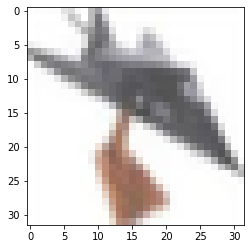

In [6]:
plt.imshow(x_test[215])

### Building a Convolutional Neural Network

In [7]:
cnn_model=tf.keras.models.Sequential()

In [8]:
# First Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [9]:
# Second Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [10]:
# Max Pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [11]:
# Third Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [12]:
# Fourth Layer
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [13]:
# Max Pooling Layer
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [14]:
# Flattening Layer
cnn_model.add(tf.keras.layers.Flatten())

In [15]:
# Droput Layer
cnn_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [16]:
# Adding the dense layer
cnn_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [17]:
# Output Layer
cnn_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

#### Compiling the Model

In [19]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

#### Training the Model

In [20]:
cnn_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4253 - sparse_categorical_accuracy: 0.4823
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0313 - sparse_categorical_accuracy: 0.6358
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8746 - sparse_categorical_accuracy: 0.6891
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7855 - sparse_categorical_accuracy: 0.7221
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7169 - sparse_categorical_accuracy: 0.7473
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6588 - sparse_categorical_accuracy: 0.7663
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6147 - sparse_categorical_accuracy: 0.7813
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5768 - sparse_categorical_accuracy: 0.7954
Epoch 9/15
1563/1563 [=========

In [21]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6957 - sparse_categorical_accuracy: 0.7749


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7749000191688538


In [23]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 442 kB 14.3 MB/s 
     |████████████████████████████████| 13.1 MB 62.2 MB/s 


In [26]:
import onnx
import tf2onnx

In [28]:
onnx_model, _ = tf2onnx.convert.from_keras(cnn_model)
onnx.save(onnx_model, '/content/drive/MyDrive/dlmodel/cifar_classifier.onnx')

Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


#### Saving the trained Model

In [ ]:
model_json = cnn_model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/cnn_model.json', 'w') as json_file:
    json_file.write(model_json)
cnn_model.save_weights('/content/drive/My Drive/Colab Notebooks/cnn_model.h5') 

In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/My Drive/Colab Notebooks/cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/content/drive/My Drive/Colab Notebooks/cnn_model.h5')

In [ ]:
loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6767 - sparse_categorical_accuracy: 0.7867
Test Accuracy: 0.7867000102996826
